<a href="https://colab.research.google.com/github/rocharomao/agilebigdata/blob/master/DataDrivenCoach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

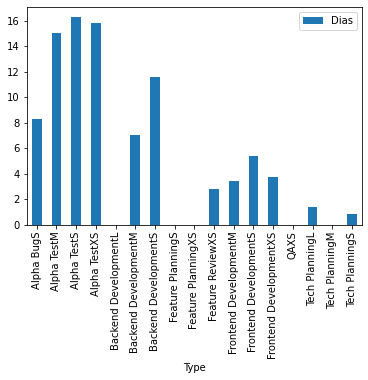

In [12]:
#Formulário de interação
#@title Data-Driven Agile Coach { display-mode: "code" }
#Importação de bibliotecas
import seaborn as sns
from pandas import read_csv

Arquivo = 'https://github.com/rocharomao/agilebigdata/raw/master/PredTiposTamInput.csv' #@param {type:"string"}

#Importação de planilha com input
name = Arquivo
Tipo = "Previsibilidade" #@param ["Selecione o tipo de análise", "Box-Plot", "Histrograma", "Scatterplot", "Scatterplot colorido", "Linha", "Dispersão", "Previsibilidade"] {allow-input: false}
Certeza = 85  #@param {type: "slider", min: 0, max: 100}

#Importação do arquivo
data = read_csv(name, delimiter=";", encoding="latin-1")

#Função para definição do grático Box-Plot
def boxplot(data):
  #Apresentação do gráfico Box-Plot
  ax = sns.boxplot(x="Dias", y="Type", data=data)

#Função para definição do grático Scatterplot
def scatter(data):
  #Apresentação do gráfico Scatterplot
  data.plot('Dias', 'Type', kind='scatter')


#Função para definição do grático Scatterplot colorido
def scattercolor(data):
  #Apresentação do gráfico Scatterplot colorido
  ax = sns.catplot(x="Dias", y="Type", data=data)

#Função para definição do grático Histograma
def barplot(data):
  #Apresentação do gráfico de barras
  #data.plot(kind='bar')
  ax = sns.barplot(x="Dias", y="Type", data=data)

#Função para definição do grático de linha
def lineplot(data):
  #Apresentação do gráfico de linha
  data.plot()

#Função para definição do gráfico com desvios padrão
def dpplot(data):
  #Medição de dispersão pelo desvio padrão
  data.groupby(['Type']).std().plot(kind='bar')

#Função para apresentar gráfico por quantil
def dpplot(data, q=0.85):
  #Apresentação da quantidade de dias por quantil
  data.groupby(['Type']).quantile(q).plot(kind='bar')


#Classe de definição dos tipos
class Analise:
  box = "Box-Plot";
  hist = "Histrograma";
  sct = "Scatterplot";
  lin = "Linha";
  sctcolor = "Scatterplot colorido";
  std = "Dispersão";
  prev = "Previsibilidade";

# Recebe o tipo de análise
tipo = Tipo;

if tipo == Analise.box:
  boxplot(data);
elif tipo == Analise.hist:
  barplot(data);
elif tipo == Analise.sct:
  scatter(data);
elif tipo == Analise.sctcolor:
  scattercolor(data);
elif tipo == Analise.lin:
  lineplot(data);
elif tipo == Analise.std:
  dpplot(data);
elif tipo == Analise.prev:
  dpplot(data, q=Certeza/100)
else:
  print("Selecione um tipo de análise!");

